# Importing Libraries

In [1]:
# importing necessary libraries
# importing numpy for mathematical calculations
import numpy as np
#importing ImageDataGenerator to convert image into numerical data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# importing Sequential CNN model
from tensorflow.keras.models import Sequential
import cv2
# importing Conv2D for creting convolution layer and MaxPooling2D for pooling
from tensorflow.keras.layers import Conv2D,MaxPooling2D
# importing Flatten to convert 2D Array into 1D to create Dense Layer, Dropout is used to overcome overfitting.
from tensorflow.keras.layers import Flatten,Dense,Activation,Dropout
# importing Adam optimizer
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import BatchNormalization

import matplotlib.pyplot as plt

import os


# Importing Data

In [2]:
img_array = cv2.imread("train/angry/0.jpg")

In [3]:
img_array.shape

(48, 48, 3)

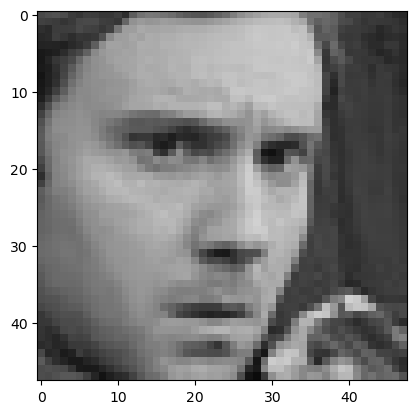

In [4]:
plt.imshow(img_array)

In [5]:
Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

In [6]:
# path for train data and validation data
TrainDirectory  = "train/"
ValidateDirectory = "validation/"

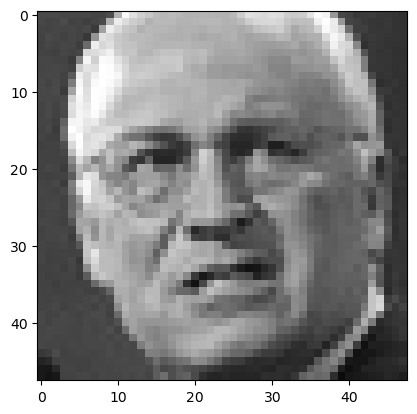

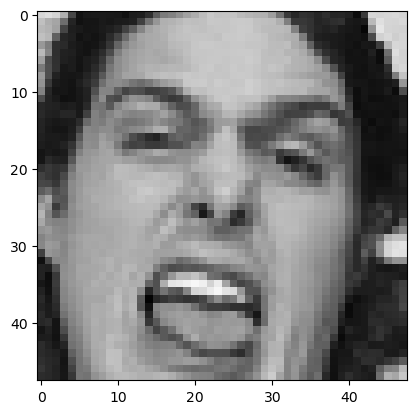

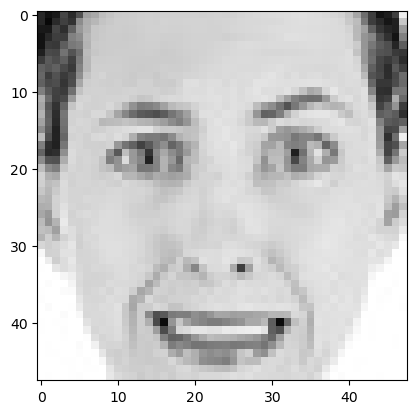

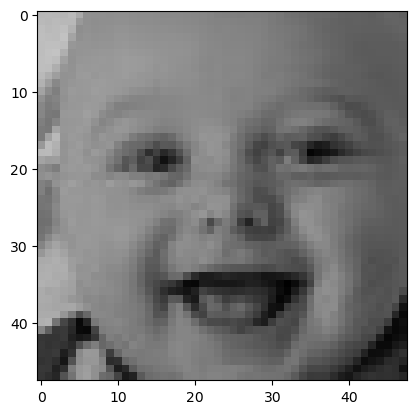

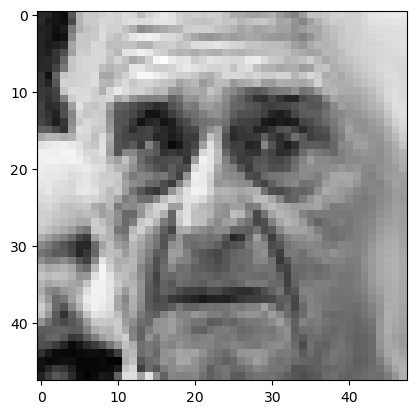

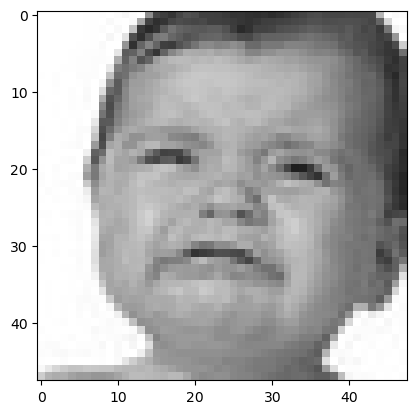

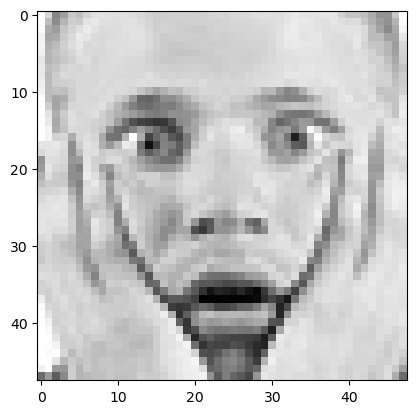

In [7]:
# lets have a look at the images in each each
for Category in Classes:
    path = os.path.join(TrainDirectory, Category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    

# Data Analysis

In [8]:
img_shape = 224

In [9]:
# Resizing the image
new_array = cv2.resize(img_array,(img_shape,img_shape))

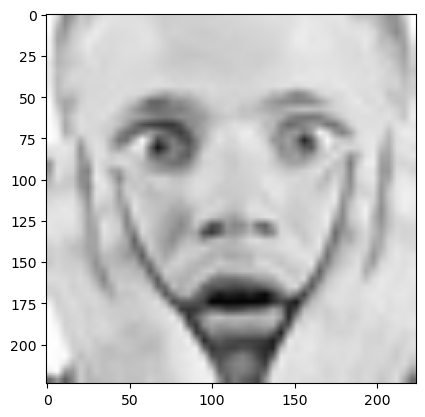

In [10]:
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
# Lets define a function that converts the data into array format
Training_data = []
Validation_data = []

def create_data(DataDirectory,data,Classes):
    for Category in Classes:
        path = os.path.join(DataDirectory,Category)
        class_num = Classes.index(Category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_shape,img_shape))
                data.append([new_array,class_num])
            except Exception as e:
                pass

In [13]:
# creating training data
create_data(TrainDirectory,Training_data,Classes)

In [14]:
len(Training_data)

28821

### we have 28821 images in Training data

In [15]:
# creating validation data
create_data(ValidateDirectory,Validation_data,Classes)

In [16]:
len(Validation_data)

7066

### we have 7066 images in validation data

In [17]:
Training_data[28820][1]

6

In [18]:
Validation_data[7065][1]

6

In [19]:
# shuffling the data
import random
random.shuffle(Training_data)
random.shuffle(Validation_data)

In [20]:
Training_data[0][1]

6

In [21]:
Validation_data[0][1]

2

In [22]:
# splitting the data into X_train and y_train
X_train = []
y_train = []

for features,labels in Training_data:
    X_train.append(features)
    y_train.append(labels)
    
X_train = np.array(X_train).reshape(-1,img_shape,img_shape,3)

In [23]:
# splitting the data into X_validation and y_validation
X_validation = []
y_validation = []

for features,labels in Validation_data:
    X_validation.append(features)
    y_validation.append(labels)
    
X_validation = np.array(X_train).reshape(-1,img_shape,img_shape,3)

In [24]:
X_train.shape

(28821, 224, 224, 3)

In [25]:
X_train[1]

array([[[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [206, 206, 206],
        [206, 206, 206],
        [206, 206, 206]],

       [[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [206, 206, 206],
        [206, 206, 206],
        [206, 206, 206]],

       [[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [206, 206, 206],
        [206, 206, 206],
        [206, 206, 206]],

       ...,

       [[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       [[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       [[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]]

In [26]:
type(X_train)

numpy.ndarray

In [27]:
type(y_train)

list

In [28]:
# converting the y_train into numpy array format
y_train = np.array(y_train)

In [29]:
type(y_train)

numpy.ndarray

In [30]:
y_train[1]

4

In [31]:
import pandas as pd
df = pd.DataFrame(y_train,columns= ['Class'])

In [32]:
df.head()

,Class
0,6
1,4
2,5
3,6
4,0


In [33]:
# Lets check the count of images in each class
df['Class'].value_counts()

Class
3    7164
4    4982
5    4938
2    4103
0    3993
6    3205
1     436
Name: count, dtype: int64

In [34]:
df['Class'] = df['Class'].apply(lambda x:'angry' if x == 0 else 'disgust' if x == 1 else 'fear' if x == 2 else 'happy' if x == 3 else 'neutral' if x == 4 else 'sad' if x == 5 else 'surprise')

In [35]:
df['Class'].value_counts()

Class
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

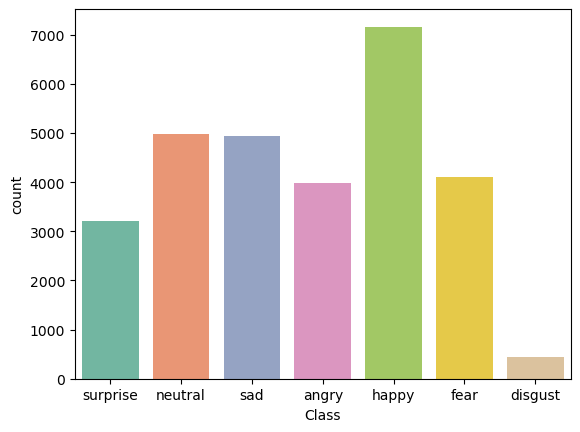

In [37]:
sns.countplot(x ='Class', data = df, palette = "Set2")
 
# Show the plot
plt.show()

### From the above graph we can clearly interpret the count of images in each class, happy class has the highest count of images

In [51]:
# Import Train data and preprocess the images

path = "/Users/reddy/Desktop/RK20UG45_Kunduru Jayasimha Reddy/"

# First the value of each pixel will be in the range 0 to 255.
# Now we will Normalize the pixel vale by rescaling it.
# After rescaling the pixel value lies between 0 to 1.
traindata_generate = ImageDataGenerator(rescale = 1.0 / 255.0)

# target_size represents the image size and here it is 224*224.
# consider batch_size as 64.

train_data = traindata_generate.flow_from_directory(path+"train",
    target_size = (48,48),
    batch_size = 64,
    #color_mode = "grayscale",
    class_mode = 'categorical'
)



Found 28821 images belonging to 7 classes.


In [52]:
# Import Validation Data and preprocess the images

validateData_generate = ImageDataGenerator(rescale = 1.0/255.0)

validate_data = validateData_generate.flow_from_directory(path+"validation",
                                                         target_size = (224,224),
                                                         batch_size = 64,
                                                         #color_mode = "grayscale",
                                                         class_mode = 'categorical')



Found 7066 images belonging to 7 classes.


# Creating model

## Creating model Architecture

In [48]:
# using sequential API to build the architecture
model3 = Sequential()

In [49]:
# Convolution Unit 1

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same',input_shape=(224, 224, 1)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, kernel_size = (3,3), padding = 'same',activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model3.add(Dropout(0.25))

# Convolution Unit 2

model3.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model3.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model3.add(Dropout(0.25))

# Convolutoin Unit 3
model3.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model3.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model3.add(Dropout(0.25))

# Convolution Unit 4
model3.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model3.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model3.add(Dropout(0.25))


# Flatten the output of convolution unit 4
model3.add(Flatten())


# Fully Connected Layer 1

model3.add(Dense(1024, activation = 'relu',kernel_regularizer=l2(0.0001)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(7, activation = 'softmax'))



In [50]:
# using learning rate scheduler, to avoid model from ovefitting

from keras.callbacks import LearningRateScheduler
import tensorflow as tf

def scheduler(epoch,lr):
    if(epoch<=10):
        return lr
    else:
        return lr* tf.math.exp(-0.1)
    

callback = LearningRateScheduler(scheduler)

In [ ]:
model3.compile(loss= 'categorical_crossentropy',optimizer= Adam(lr = 0.0001), metrics=['accuracy'])
print(model3.summary())

# Model Training

In [52]:
model3.fit_generator(
train_data,
steps_per_epoch = 28821 // 64,
epochs = 50,
callbacks = callback,
validation_data = validate_data,
validation_steps = 7066 // 64)

Epoch 1/50
450/450 [==============================] - 2578s 6s/step - loss: 2.3830 - accuracy: 0.2082 - val_loss: 2.0121 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/50
450/450 [==============================] - 2355s 5s/step - loss: 2.0274 - accuracy: 0.2437 - val_loss: 2.0452 - val_accuracy: 0.1862 - lr: 0.0010
Epoch 3/50
450/450 [==============================] - 2033s 5s/step - loss: 1.8603 - accuracy: 0.3099 - val_loss: 1.8086 - val_accuracy: 0.3205 - lr: 0.0010
Epoch 4/50
450/450 [==============================] - 2078s 5s/step - loss: 1.6647 - accuracy: 0.3971 - val_loss: 1.7357 - val_accuracy: 0.3675 - lr: 0.0010
Epoch 5/50
450/450 [==============================] - 2189s 5s/step - loss: 1.5399 - accuracy: 0.4468 - val_loss: 1.5867 - val_accuracy: 0.4145 - lr: 0.0010
Epoch 6/50
450/450 [==============================] - 2690s 6s/step - loss: 1.4384 - accuracy: 0.4877 - val_loss: 2.2181 - val_accuracy: 0.2903 - lr: 0.0010
Epoch 7/50
450/450 [==============================] - 2314

In [9]:
# save model structure in jason file
model_json = model3.to_json()
with open("mainModel.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model3.save_weights('mainModel.h5')

NameError: name 'model3' is not defined

In [4]:
from keras.models import model_from_json

# load json and create model
json_file = open('mainModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
mainModel = model_from_json(loaded_model_json)

# load weights into new model
mainModel.load_weights("mainModel.h5")
print("Loaded model from disk")

Loaded model from disk


# Making Predictions

In [5]:
mainModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                      

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/Users/reddy/Desktop/Facial Emotion Detection Project/samples/sample.png"
img = image.load_img(img_path, target_size=(224, 224), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/reddy/Desktop/Facial Emotion Detection Project/samples/sample.png'

In [95]:
predictions = mainModel.predict(img_array)

1/1 [==============================] - 0s 152ms/step


In [96]:
predicted_class = np.argmax(predictions)
emotion_labels = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']
predicted_emotion = emotion_labels[predicted_class]

print(f'The predicted emotion is: {predicted_emotion}')

The predicted emotion is: Happy


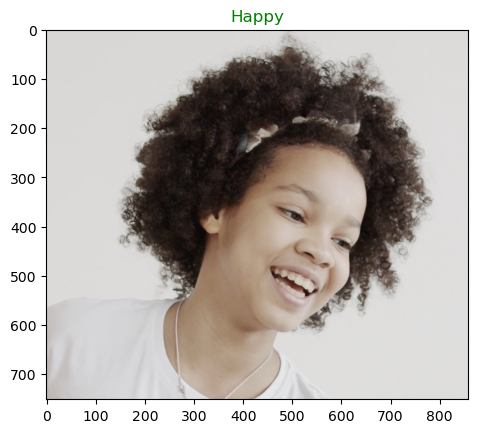

In [97]:
import matplotlib.pyplot as plt
img_array = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.title(predicted_emotion,color="green")
plt.show()

In [98]:
emoji_folder = "/Users/reddy/Desktop/Facial Emotion Detection Project/emoji/"
emoji_path = emoji_folder+predicted_emotion+".png"
print(emoji_path)

/Users/reddy/Desktop/Facial Emotion Detection Project/emoji/Happy.png


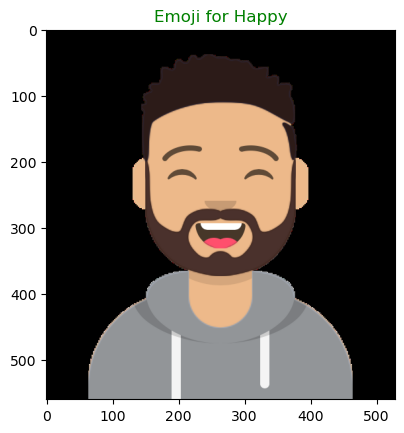

In [99]:
emoji = cv2.imread(emoji_path)
plt.imshow(cv2.cvtColor(emoji, cv2.COLOR_BGR2RGB))
plt.title("Emoji for " + predicted_emotion,color="green")
plt.show()

In [61]:
import tensorflow as tf
vgg_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(include_top=False,
                   input_shape=(48,48,3),
                   pooling='max',classes=7)

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(7, activation='softmax'))

In [62]:
vgg_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.0001),metrics = ['accuracy'])

In [63]:
vgg_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 14980935 (57.15 MB)
Trainable params: 266247 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [60]:
vgg_model.fit(train_data,
steps_per_epoch = 28821 // 64,
epochs = 50,
validation_data = validate_data,
validation_steps = 7066 // 64)

Epoch 1/50
450/450 [==============================] - 1262s 3s/step - loss: 1.6129 - accuracy: 0.3701 - val_loss: 2.8441 - val_accuracy: 0.1612
Epoch 2/50
450/450 [==============================] - 1660s 4s/step - loss: 1.5255 - accuracy: 0.4114 - val_loss: 2.8207 - val_accuracy: 0.1608
Epoch 3/50
450/450 [==============================] - 1653s 4s/step - loss: 1.4779 - accuracy: 0.4328 - val_loss: 2.4113 - val_accuracy: 0.1808
Epoch 4/50
450/450 [==============================] - 1715s 4s/step - loss: 1.4416 - accuracy: 0.4444 - val_loss: 2.6856 - val_accuracy: 0.1656
Epoch 5/50
450/450 [==============================] - 1708s 4s/step - loss: 1.3970 - accuracy: 0.4675 - val_loss: 2.8512 - val_accuracy: 0.1659
Epoch 6/50
450/450 [==============================] - 1739s 4s/step - loss: 1.3609 - accuracy: 0.4835 - val_loss: 3.7214 - val_accuracy: 0.1599
Epoch 7/50
450/450 [==============================] - ETA: 0s - loss: 1.3189 - accuracy: 0.5001

KeyboardInterrupt: 